In [1]:
!pip install joblib

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

In [3]:
# File path
og_file_path = pd.read_csv("D:\\JOB ASSIGNMENT\\New_df.csv")
churn_file_path = pd.read_csv("D:\\JOB ASSIGNMENT\\df_stayed_churned.csv")
joined_file_path = pd.read_csv("D:\\JOB ASSIGNMENT\\df_joined.csv")

In [4]:
# Drop the column that won't be used for prediction
#og_file_path = og_file_path.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)
churn_file_path = churn_file_path.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)
#joined_file_path = joined_file_path.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

In [5]:
churn_file_path

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,Male,35,No,Delhi,7,27,No,Yes,No,Yes,...,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,0
1,Female,45,Yes,Maharashtra,14,13,No,Yes,Yes,Yes,...,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,0
2,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,Yes,...,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,1
3,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,Yes,...,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,1
4,Female,80,No,Tamil Nadu,3,8,No,Yes,No,Yes,...,Month-to-Month,Yes,Credit Card,83.90,267.40,0.00,0,22.14,289.54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,Female,41,No,Uttar Pradesh,6,33,No,Yes,Yes,Yes,...,Month-to-Month,Yes,Credit Card,74.40,896.75,0.00,0,37.96,934.71,1
6003,Male,51,Yes,Haryana,0,19,Deal 1,No,No,Yes,...,Two Year,No,Credit Card,45.25,3139.80,0.00,0,0.00,3139.80,0
6004,Female,65,Yes,Kerala,14,25,No,Yes,Yes,Yes,...,Month-to-Month,Yes,Bank Withdrawal,74.95,2869.85,0.00,0,599.64,3469.49,1
6005,Male,23,No,Odisha,2,10,No,Yes,Yes,Yes,...,One Year,Yes,Credit Card,70.15,4480.70,0.00,0,2107.52,6588.22,0


In [6]:
# List of columns to be label encoded
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

In [7]:
# Encode categorical variables except the target variable

label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    churn_file_path[column] = label_encoders[column].fit_transform(churn_file_path[column])

In [23]:
churn_file_path

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,1,35,0,4,7,27,5,1,0,1,...,1,1,1,65.60,593.30,0.00,0,381.51,974.81,0
1,0,45,1,12,14,13,5,1,1,1,...,0,0,1,-4.00,542.40,38.33,10,96.21,610.28,0
2,1,51,0,21,4,35,4,1,0,1,...,0,1,0,73.90,280.85,0.00,0,134.60,415.45,1
3,1,79,0,9,3,21,3,1,0,1,...,0,1,0,98.00,1237.85,0.00,0,361.66,1599.51,1
4,0,80,0,17,3,8,5,1,0,1,...,0,1,1,83.90,267.40,0.00,0,22.14,289.54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,0,41,0,19,6,33,5,1,1,1,...,0,1,1,74.40,896.75,0.00,0,37.96,934.71,1
6003,1,51,1,6,0,19,0,0,0,1,...,2,0,1,45.25,3139.80,0.00,0,0.00,3139.80,0
6004,0,65,1,10,14,25,5,1,1,1,...,0,1,0,74.95,2869.85,0.00,0,599.64,3469.49,1
6005,1,23,0,13,2,10,5,1,1,1,...,1,1,1,70.15,4480.70,0.00,0,2107.52,6588.22,0


In [8]:
# Manually encode the target variable 'Customer_Status'
#churn_file_path['Customer_Status'] = churn_file_path['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

In [9]:
# Split data into features and target
X = churn_file_path.drop('Customer_Status', axis=1)
y = churn_file_path['Customer_Status']

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model

In [11]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluate Model

In [12]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[791  50]
 [125 236]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       841
           1       0.83      0.65      0.73       361

    accuracy                           0.85      1202
   macro avg       0.84      0.80      0.81      1202
weighted avg       0.85      0.85      0.85      1202



In [13]:
# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

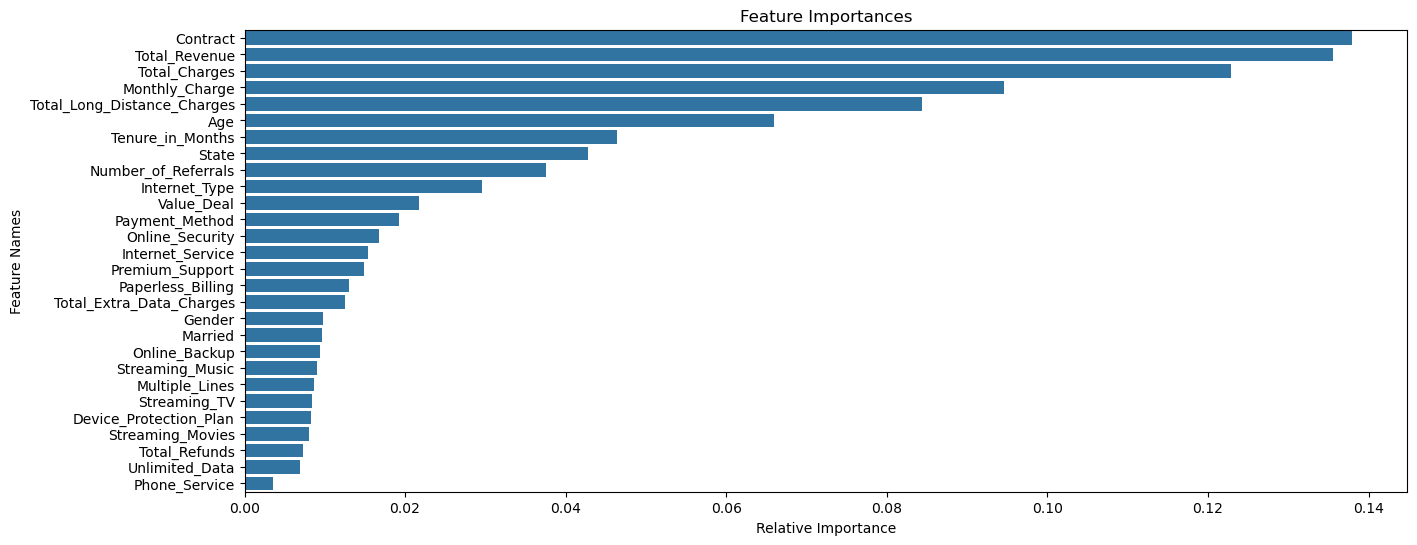

In [14]:
# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

# Use Model for Prediction on New Data

In [15]:
joined_file_path

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,93520-GUJ,Female,67,No,Gujarat,13,19,Deal 5,Yes,Yes,...,Bank Withdrawal,72.10,72.10,0.0,0,7.77,79.87,2,No,No
1,57256-BIH,Female,18,No,Bihar,9,7,No,Yes,No,...,Credit Card,19.85,57.20,0.0,0,9.36,66.56,2,No,No
2,72357-MAD,Female,53,No,Madhya Pradesh,14,12,Deal 5,Yes,No,...,Credit Card,44.30,44.30,0.0,0,42.95,87.25,2,No,No
3,66612-KAR,Female,58,Yes,Karnataka,11,18,No,Yes,No,...,Credit Card,19.95,58.00,0.0,0,8.07,66.07,2,No,No
4,22119-WES,Male,31,Yes,West Bengal,5,5,No,Yes,No,...,Credit Card,20.05,33.70,0.0,0,3.62,37.32,2,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,31412-HAR,Female,81,Yes,Haryana,14,29,No,Yes,No,...,Bank Withdrawal,19.20,37.20,0.0,0,14.06,51.26,2,No,No
407,54997-UTT,Female,55,No,Uttar Pradesh,7,23,No,Yes,No,...,Credit Card,44.00,44.00,0.0,0,26.15,70.15,2,No,No
408,56728-RAJ,Male,40,No,Rajasthan,0,1,No,Yes,No,...,Credit Card,45.60,45.60,0.0,0,37.44,83.04,2,No,No
409,47624-TAM,Female,62,Yes,Tamil Nadu,7,29,No,Yes,No,...,Mailed Check,-5.00,189.10,0.0,0,100.59,289.69,2,No,No


In [16]:
# Retain the original DataFrame to preserve unencoded columns
original_data = joined_file_path.copy()

# Retain the Customer_ID column
customer_ids = joined_file_path['Customer_ID']

# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = joined_file_path.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

In [17]:
# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

In [18]:
# Make predictions
new_predictions = rf_model.predict(new_data)

In [19]:
# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

In [20]:
# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

In [21]:
original_data

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason,Customer_Status_Predicted
0,93520-GUJ,Female,67,No,Gujarat,13,19,Deal 5,Yes,Yes,...,72.10,72.1,0.0,0,7.77,79.87,2,No,No,1
1,57256-BIH,Female,18,No,Bihar,9,7,No,Yes,No,...,19.85,57.2,0.0,0,9.36,66.56,2,No,No,1
2,72357-MAD,Female,53,No,Madhya Pradesh,14,12,Deal 5,Yes,No,...,44.30,44.3,0.0,0,42.95,87.25,2,No,No,1
3,66612-KAR,Female,58,Yes,Karnataka,11,18,No,Yes,No,...,19.95,58.0,0.0,0,8.07,66.07,2,No,No,1
4,22119-WES,Male,31,Yes,West Bengal,5,5,No,Yes,No,...,20.05,33.7,0.0,0,3.62,37.32,2,No,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,21065-HAR,Male,27,No,Haryana,5,10,No,Yes,No,...,20.30,20.3,0.0,0,10.84,31.14,2,No,No,1
406,31412-HAR,Female,81,Yes,Haryana,14,29,No,Yes,No,...,19.20,37.2,0.0,0,14.06,51.26,2,No,No,1
407,54997-UTT,Female,55,No,Uttar Pradesh,7,23,No,Yes,No,...,44.00,44.0,0.0,0,26.15,70.15,2,No,No,1
408,56728-RAJ,Male,40,No,Rajasthan,0,1,No,Yes,No,...,45.60,45.6,0.0,0,37.44,83.04,2,No,No,1


In [22]:
original_data.to_csv('D:\\JOB ASSIGNMENT\\original_data.csv', index=False)

In [24]:
original_data.isnull().sum()

Customer_ID                    0
Gender                         0
Age                            0
Married                        0
State                          0
Number_of_Referrals            0
Tenure_in_Months               0
Value_Deal                     0
Phone_Service                  0
Multiple_Lines                 0
Internet_Service               0
Internet_Type                  0
Online_Security                0
Online_Backup                  0
Device_Protection_Plan         0
Premium_Support                0
Streaming_TV                   0
Streaming_Movies               0
Streaming_Music                0
Unlimited_Data                 0
Contract                       0
Paperless_Billing              0
Payment_Method                 0
Monthly_Charge                 0
Total_Charges                  0
Total_Refunds                  0
Total_Extra_Data_Charges       0
Total_Long_Distance_Charges    0
Total_Revenue                  0
Customer_Status                0
Churn_Cate